In [4]:
import os
import re
import pandas as pd

# Directories
log_dirs = [
    "./Ping_Logs/speed_ping_logs_size_test_cloud",
    "./Ping_Logs/speed_ping_logs_size_test_internal",
    "./Ping_Logs/speed_ping_logs_size_test_network"
]

# Regex to extract RTT times from ping output
rtt_pattern = re.compile(r'time=([\d.]+) ms')

# Storage
data = []

for folder in log_dirs:
    environment = os.path.basename(folder).replace("speed_ping_logs_", "").replace("_", " ").title()
    
    for filename in os.listdir(folder):
        if not filename.endswith(".log"):
            continue
        
        filepath = os.path.join(folder, filename)
        parts = filename.split("_")
        
        ip = ".".join(parts[:4])  # e.g., 192.168.122.34
        size = int(parts[4][1:])  # 's512' -> 512
        mode = int(parts[5][1:])  # 'm1' -> 1
        interval = int(parts[6].split('.')[0][1:-2])  # 'i100ms.log' -> 100

        with open(filepath, 'r') as file:
            rtts = [float(match.group(1)) for line in file for match in [rtt_pattern.search(line)] if match]

        if rtts:
            avg_rtt = sum(rtts) / len(rtts)
            data.append({
                "Environment": environment,
                "IP": ip,
                "Size": size,
                "Mode": mode,
                "Interval": interval,
                "AverageRTT": avg_rtt
            })

# Create DataFrame
df = pd.DataFrame(data)
df

,Environment,IP,Size,Mode,Interval,AverageRTT
0,Size Test Cloud,1.1.1.1,32,1,100,19.95686
1,Size Test Cloud,1.1.1.1,65508,1,100,34.53342
2,Size Test Cloud,1.1.1.1,32768,1,100,28.19046
3,Size Test Cloud,1.1.1.1,4096,1,100,20.66032
4,Size Test Cloud,1.1.1.1,128,1,100,19.41910
5,Size Test Cloud,1.1.1.1,65515,1,100,34.76770
6,Size Test Cloud,1.1.1.1,16384,1,100,24.84566
7,Size Test Cloud,1.1.1.1,8192,1,100,22.54708
8,Size Test Cloud,1.1.1.1,65507,1,100,33.24570
9,Size Test Cloud,1.1.1.1,512,1,100,19.30528


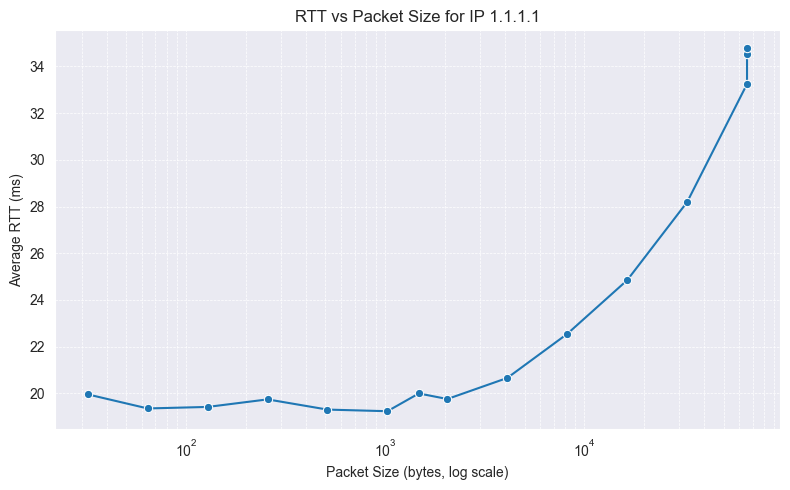

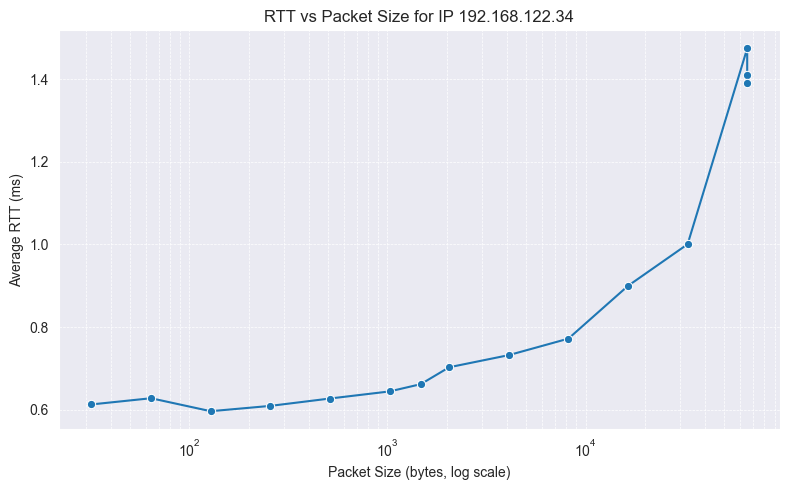

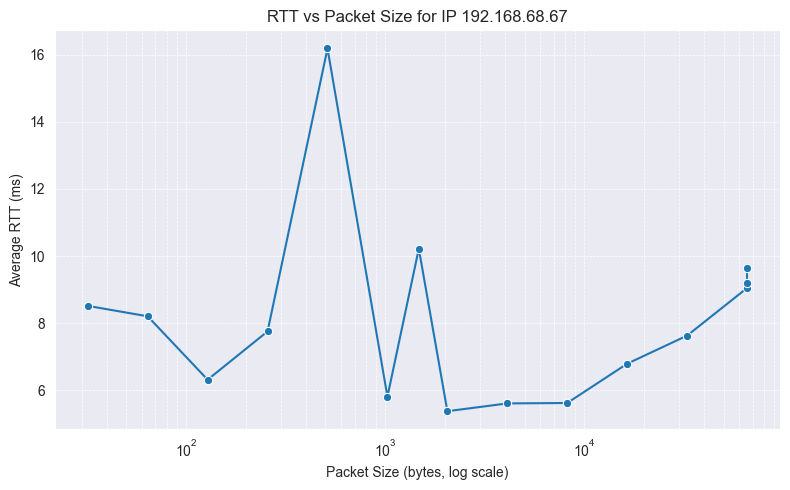

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique IPs
unique_ips = df["IP"].unique()

# Plot one graph per IP
for ip in unique_ips:
    subset = df[df["IP"] == ip].sort_values(by="Size")

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=subset, x="Size", y="AverageRTT", marker='o')
    plt.xscale("log")  # Use log scale for size to improve spacing
    plt.title(f"RTT vs Packet Size for IP {ip}")
    plt.xlabel("Packet Size (bytes, log scale)")
    plt.ylabel("Average RTT (ms)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f"rtt_vs_size_{ip.replace('.', '_')}.png")
    plt.show()


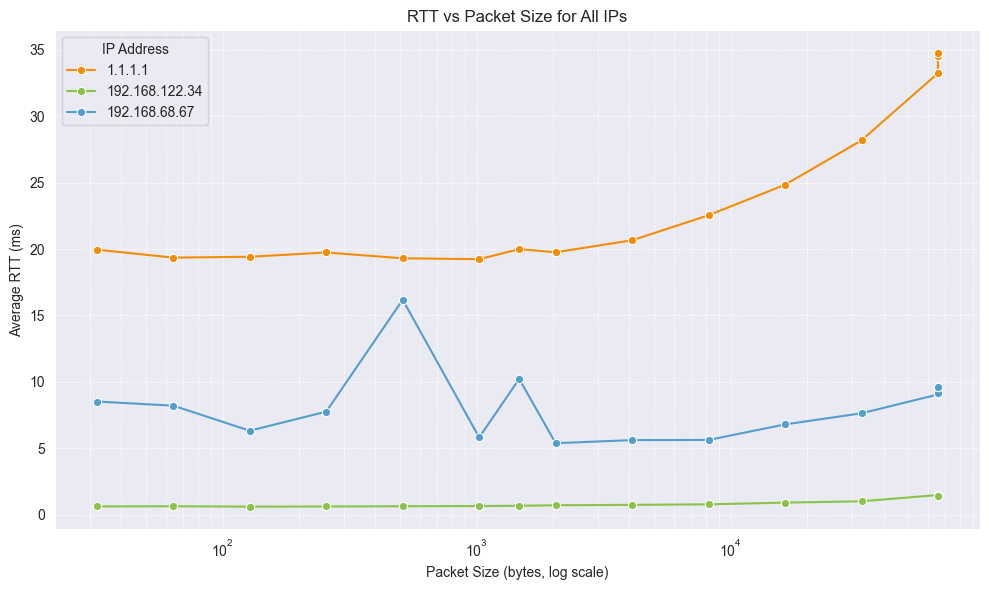

In [5]:
# Plot one graph for all IPs
custom_palette = {
    "192.168.68.67": "#539ecd",   # Blue (originally for 1.1.1.1)
    "1.1.1.1": "#f48c06",         # Orange (originally for 192.168.122.34)
    "192.168.122.34": "#8bc34a"   # Green (originally for 192.168.68.67)
}

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Size", y="AverageRTT", hue="IP", palette=custom_palette, marker='o')
plt.xscale("log")
plt.title("RTT vs Packet Size for All IPs")
plt.xlabel("Packet Size (bytes, log scale)")
plt.ylabel("Average RTT (ms)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="IP Address")
plt.tight_layout()
plt.savefig("rtt_vs_size_all_ips_custom_colors.png")
plt.show()